In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
import os

In [ ]:
data=pd.read_csv('/content/archive.zip')

In [ ]:
data.head()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [ ]:
data.dtypes

Area               float64
Perimeter          float64
Compactness        float64
Kernel.Length      float64
Kernel.Width       float64
Asymmetry.Coeff    float64
Kernel.Groove      float64
Type                 int64
dtype: object

In [ ]:
data.count()

Area               199
Perimeter          199
Compactness        199
Kernel.Length      199
Kernel.Width       199
Asymmetry.Coeff    199
Kernel.Groove      199
Type               199
dtype: int64

In [ ]:
data['Type'].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

In [ ]:
data.corr()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
Area,1.000000,0.994437,0.609887,0.951126,0.970980,-0.222820,0.862727,-0.340664
Perimeter,0.994437,1.000000,0.531841,0.972944,0.945496,-0.211034,0.889543,-0.322223
Compactness,0.609887,0.531841,1.000000,0.374011,0.762167,-0.329400,0.227016,-0.539261
Kernel.Length,0.951126,0.972944,0.374011,1.000000,0.862680,-0.169704,0.932124,-0.249422
Kernel.Width,0.970980,0.945496,0.762167,0.862680,1.000000,-0.253122,0.748228,-0.421961
Asymmetry.Coeff,-0.222820,-0.211034,-0.329400,-0.169704,-0.253122,1.000000,-0.003349,0.573956
Kernel.Groove,0.862727,0.889543,0.227016,0.932124,0.748228,-0.003349,1.000000,0.035508
Type,-0.340664,-0.322223,-0.539261,-0.249422,-0.421961,0.573956,0.035508,1.000000


In [ ]:
print(data.shape)
data.describe()

(199, 8)


,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


In [ ]:
x=np.array(data['Kernel.Length']).reshape(-1,1)
y=np.array(data['Kernel.Width']).reshape(-1,1)
LR=lm.LinearRegression().fit(x,y)
cd=LR.score(x,y)
print("coefficient of determination is ",cd)
print('intercept',LR.intercept_)
print('slope',LR.coef_)
ycap=LR.predict(x)
print('predicted response',ycap,sep='\n')

coefficient of determination is  0.7442166621703148
intercept [-0.88637183]
slope [[0.73574226]]
predicted response
[[3.35371082]
 [3.19994069]
 [3.00644047]
 [3.03071997]
 [3.27645788]
 [3.07633599]
 [3.20656237]
 [3.56707607]
 [3.44273563]
 [3.31765945]
 [3.11459458]
 [3.11533033]
 [3.14476002]
 [3.14696724]
 [3.05058501]
 [2.8798928 ]
 [3.18007565]
 [2.94316664]
 [2.95861722]
 [3.27645788]
 [3.17492545]
 [3.24702819]
 [2.86517796]
 [3.37284012]
 [3.40521278]
 [3.08295767]
 [3.08295767]
 [3.19037604]
 [3.17198248]
 [3.12636646]
 [3.34929637]
 [3.31986667]
 [3.2227487 ]
 [3.31618796]
 [3.40006258]
 [3.40447703]
 [3.2749864 ]
 [3.08442915]
 [3.04837778]
 [3.05058501]
 [2.89387191]
 [3.43758544]
 [3.21833424]
 [3.06897856]
 [3.3080948 ]
 [3.21171256]
 [3.19331901]
 [3.29117273]
 [3.2227487 ]
 [3.28822976]
 [3.31839519]
 [3.16315357]
 [3.33752449]
 [3.30883054]
 [3.07780747]
 [3.0748645 ]
 [3.27940085]
 [2.90932249]
 [2.72023673]
 [2.84825589]
 [3.08295767]
 [2.98510395]
 [2.89460765]
 [

In [ ]:
a=pd.DataFrame(data['Kernel.Length'])
b=pd.DataFrame(data['Kernel.Width'])


In [ ]:
import statsmodels.api as sms
m=sms.OLS(b,a).fit()
m.summary

<bound method RegressionResults.summary of <statsmodels.regression.linear_model.OLSResults object at 0x7f39143caa60>>

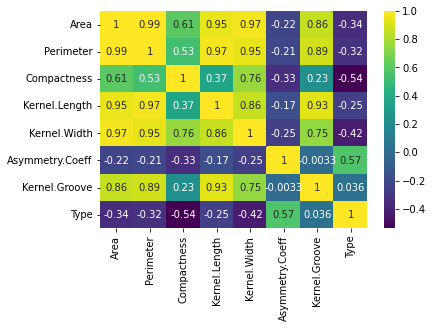

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


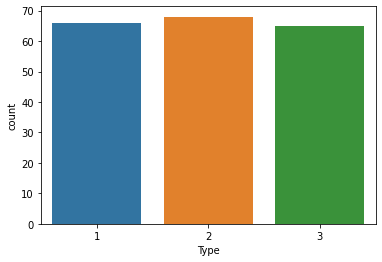

In [ ]:
sns.countplot(data.Type)

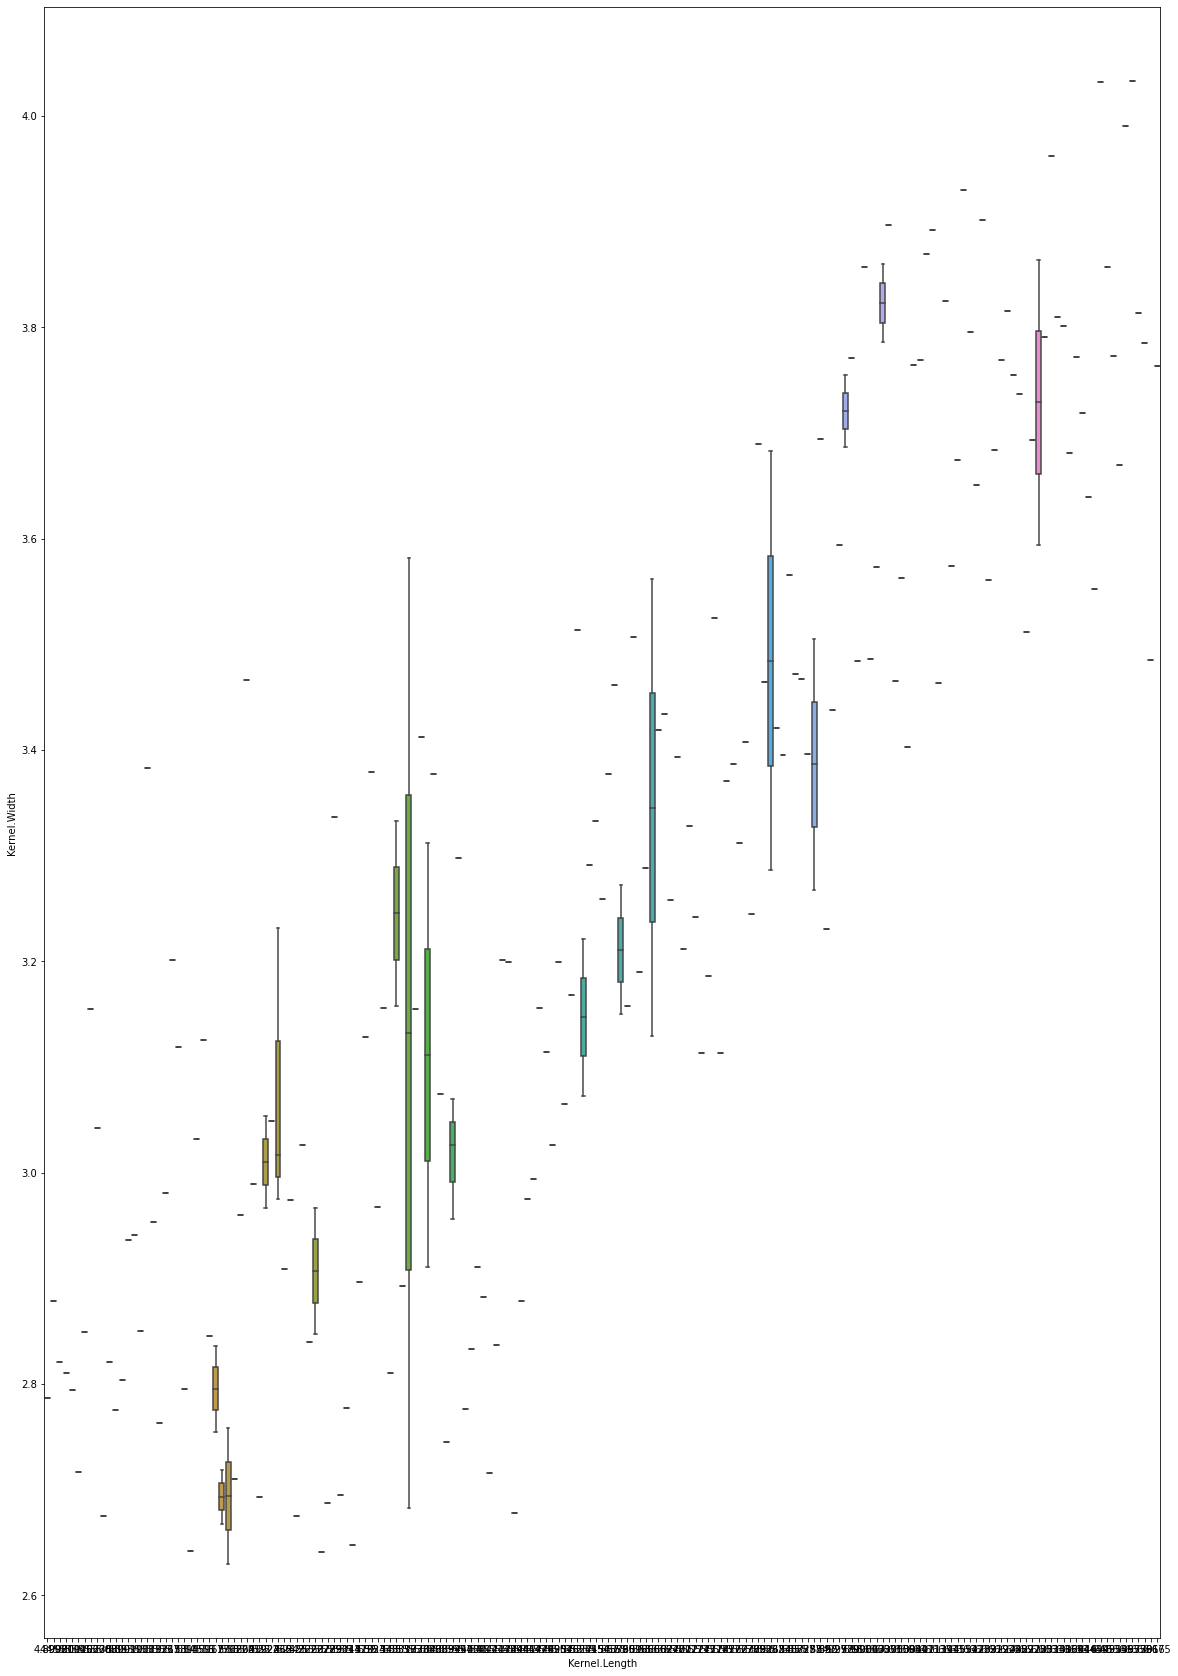

In [ ]:
plt.figure(figsize=(20,30))
sns.boxplot(x='Kernel.Length',y='Kernel.Width',data=data)
